In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve


# Load Data
df = pd.read_csv("/Users/fuminli/Desktop/611final/diabetes_012_health_indicators_BRFSS2015.csv")

df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Task description: Our project has three main objectives:

1. Dimensionality Reduction and Visualization  
   We first aim to visualize the samples in a low-dimensional space using methods such as UMAP and PCA. The goal is to examine whether the diabetes status of the subjects can be naturally separated based on their feature representations.

2. Understanding the Relationship Between “Pre-diabetes” and the Other Classes  
   If the samples cannot be clearly separated by visualization alone, we will apply statistical or machine-learning methods for further analysis. In the dataset, diabetes status has three levels: non-diabetic / pre-diabetic / diabetic. To convert this into a binary classification task, there are two natural ways to collapse the classes:  
   - Group non-diabetic + pre-diabetic together, vs. diabetic  
   - Group pre-diabetic + diabetic together, vs. non-diabetic  

As a statistics student, I am not familiar with the biological interpretation of these categories. Therefore, a key question we want to explore is: Is the classification difficulty similar under these two groupings? In other words, are pre-diabetic individuals more similar to non-diabetic subjects or to diabetic subjects in terms of their feature profiles? This helps us understand how “pre-diabetes” relates to the other two categories at the data level.

3. Comparing Statistical and Machine Learning Methods  
   Finally, we aim to compare the performance of classical statistical methods and traditional machine-learning methods on this classification task. Specifically, we will use: Logistic regression as the statistical method and Random forest as the machine-learning method to evaluate how well these methods perform on the dataset.


Data Information:

In [25]:
# Shape
print("Shape:", df.shape)

# Column types
print(df.info())

# Summary statistics
df.describe()


Shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [26]:


binary_like = [0,1]
cont_vars = []

for col in df.columns:
    if df[col].nunique() > 3 and df[col].dtype != 'object':
        cont_vars.append(col)

print("Continuous Variables:", cont_vars)


Continuous Variables: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


Exploring the distribution of diabetes outcomes:


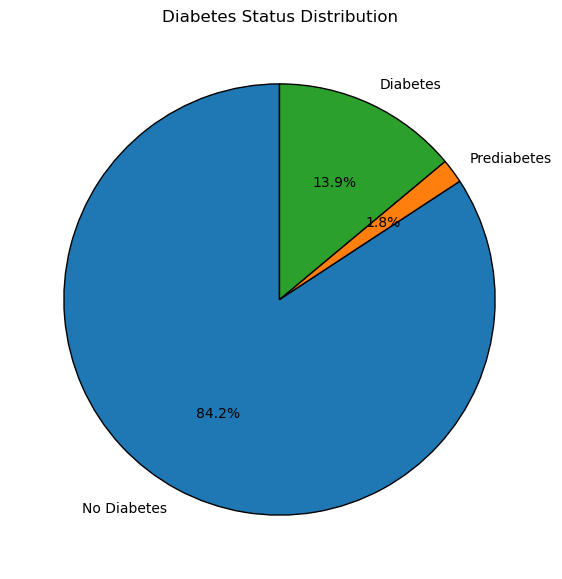

In [27]:
counts = df["Diabetes_012"].value_counts().sort_index()
labels = ["No Diabetes", "Prediabetes", "Diabetes"]

plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Diabetes Status Distribution")
plt.show()


Exploring whether the single features are highly correlated with the diabetes outcomes:

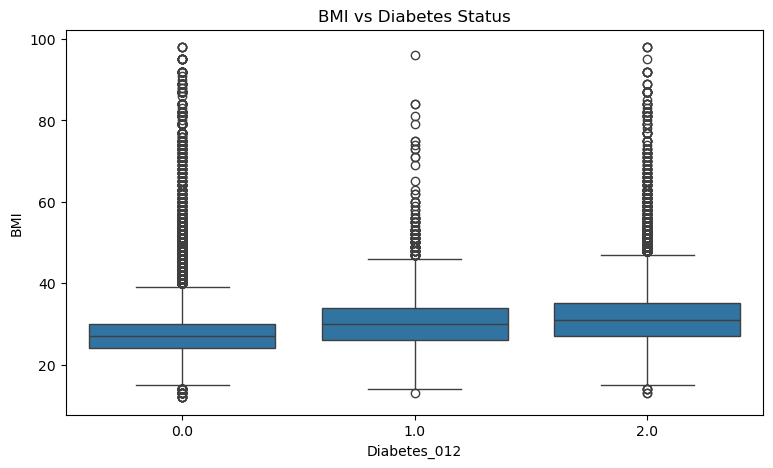

In [28]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Diabetes_012", y="BMI", data=df)
plt.title("BMI vs Diabetes Status")
plt.show()


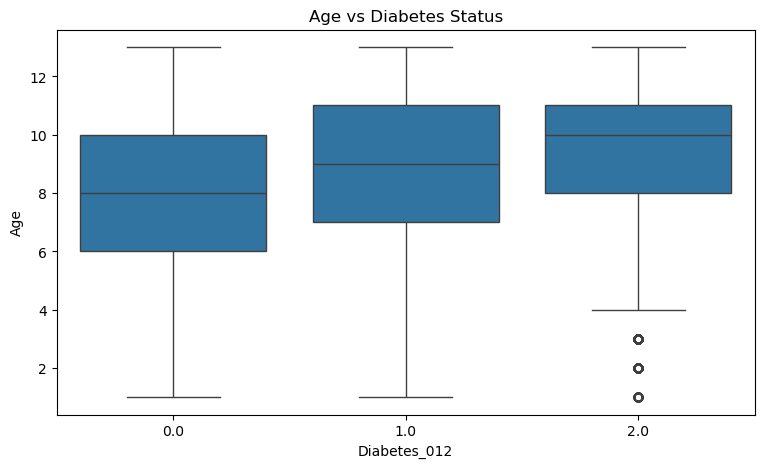

In [29]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Diabetes_012", y="Age", data=df)
plt.title("Age vs Diabetes Status")
plt.show()


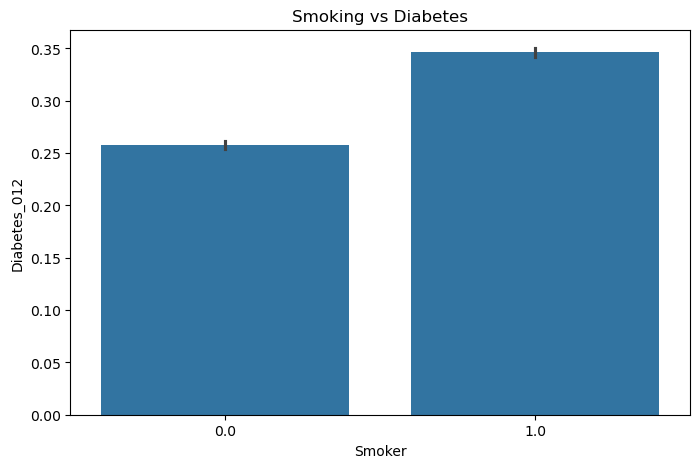

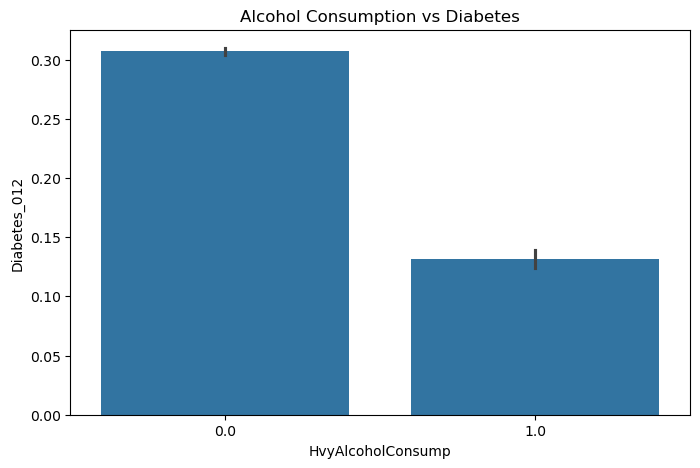

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x="Smoker", y="Diabetes_012", data=df)
plt.title("Smoking vs Diabetes")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="HvyAlcoholConsump", y="Diabetes_012", data=df)
plt.title("Alcohol Consumption vs Diabetes")
plt.show()


Exploring the relationship between each feature:

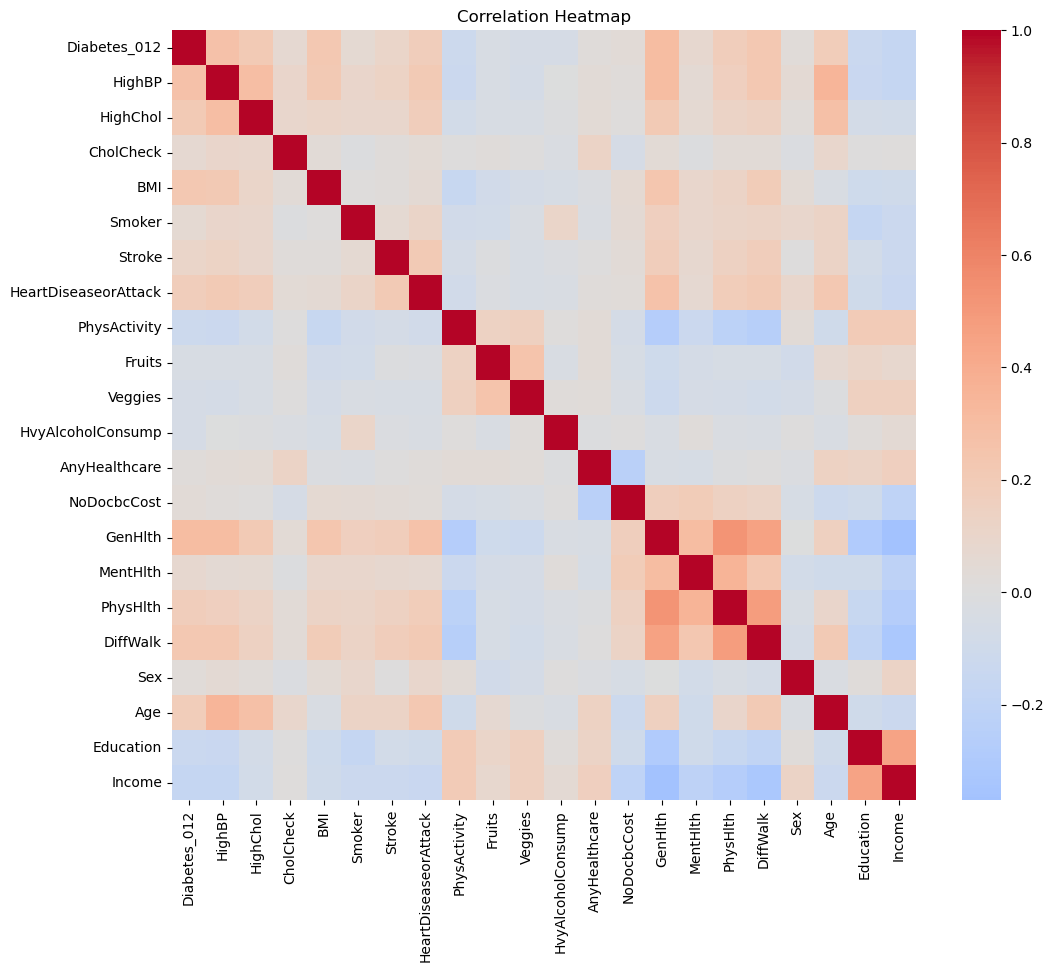

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [32]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [33]:
# Task A: 0 vs (1+2)
df["y_A"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

# Task B: (0+1) vs 2
df["y_B"] = df["Diabetes_012"].apply(lambda x: 1 if x == 2 else 0)

X = df.drop(["Diabetes_012", "y_A", "y_B"], axis=1)

X_train, X_test, yA_train, yA_test, yB_train, yB_test = train_test_split(
    X, df["y_A"], df["y_B"], test_size=0.25, random_state=42
)

def run_models(X_train, X_test, y_train, y_test, task_name="Task"):
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)
    y_prob_lr = lr.predict_proba(X_test)[:, 1]
    rf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)[:, 1]

    return {
        "lr_model": lr,
        "rf_model": rf,
        "lr_prob": y_prob_lr,
        "rf_prob": y_prob_rf
    }
results_A = run_models(X_train, X_test, yA_train, yA_test, task_name="Task A (0 vs 1+2)")
results_B = run_models(X_train, X_test, yB_train, yB_test, task_name="Task B (0/1 vs 2)")


/Users/fuminli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fuminli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Task 1 answer: 

Using PCA to do features dimension reduction and visualization, we can see that the PCA We can see that conventional dimensionality reduction methods can distinguish diabetes cases quite well, but a large number of samples with different diabetes statuses still cluster together and are difficult to differentiate. We need to use statistical or machine learning methods to assign a score to each sample.

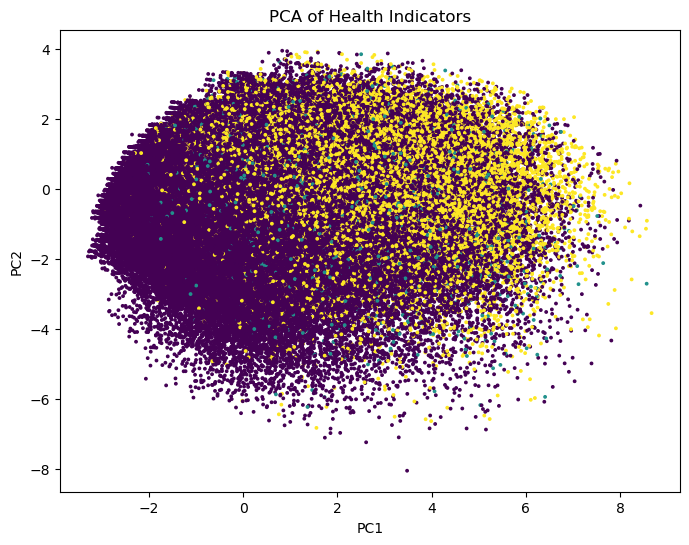

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0], pcs[:,1], c=df["Diabetes_012"], s=3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Health Indicators")
plt.show()


In [42]:
def evaluate_model_performance(y_test, lr_prob, rf_prob, lr_pred, rf_pred, task_name):

    print(f"\n\n==============================")
    print(f" Performance Comparison — {task_name}")
    print("==============================")

    # --- AUC ---
    auc_lr = roc_auc_score(y_test, lr_prob)
    auc_rf = roc_auc_score(y_test, rf_prob)

    # --- Precision ---
    precision_lr = precision_score(y_test, lr_pred)
    precision_rf = precision_score(y_test, rf_pred)

    # --- AUPRC (average precision) ---
    auprc_lr = average_precision_score(y_test, lr_prob)
    auprc_rf = average_precision_score(y_test, rf_prob)

    # Print table
    perf_table = pd.DataFrame({
        "Model": ["Logistic Regression", "Random Forest"],
        "AUC": [auc_lr, auc_rf],
        "Precision": [precision_lr, precision_rf],
        "AUPRC": [auprc_lr, auprc_rf]
    })

    print(perf_table.to_string(index=False))
    return perf_table


In [43]:
yA_test_arr = yA_test.values

perf_A = evaluate_model_performance(
    yA_test_arr,
    results_A["lr_prob"],
    results_A["rf_prob"],
    lr_pred=results_A["lr_model"].predict(X_test),
    rf_pred=results_A["rf_model"].predict(X_test),
    task_name="Task A (0 vs 1+2)"
)




 Performance Comparison — Task A (0 vs 1+2)
              Model      AUC  Precision    AUPRC
Logistic Regression 0.818846   0.552976 0.431016
      Random Forest 0.796971   0.503217 0.397580


In [44]:
yB_test_arr = yB_test.values

perf_B = evaluate_model_performance(
    yB_test_arr,
    results_B["lr_prob"],
    results_B["rf_prob"],
    lr_pred=results_B["lr_model"].predict(X_test),
    rf_pred=results_B["rf_model"].predict(X_test),
    task_name="Task B (0/1 vs 2)"
)




 Performance Comparison — Task B (0/1 vs 2)
              Model      AUC  Precision    AUPRC
Logistic Regression 0.824546   0.540437 0.405123
      Random Forest 0.802187   0.490183 0.369679


In [45]:
def plot_roc(y_test, lr_prob, rf_prob, title):
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

    auc_lr = roc_auc_score(y_test, lr_prob)
    auc_rf = roc_auc_score(y_test, rf_prob)

    plt.figure(figsize=(7,6))
    plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={auc_lr:.3f})", linewidth=2)
    plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={auc_rf:.3f})", linewidth=2)

    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


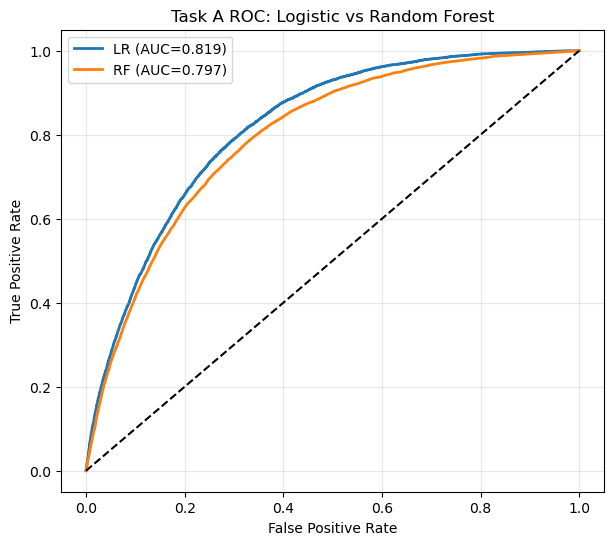

In [48]:
plot_roc(yA_test, results_A["lr_prob"], results_A["rf_prob"], 
         "Task A ROC: Logistic vs Random Forest")


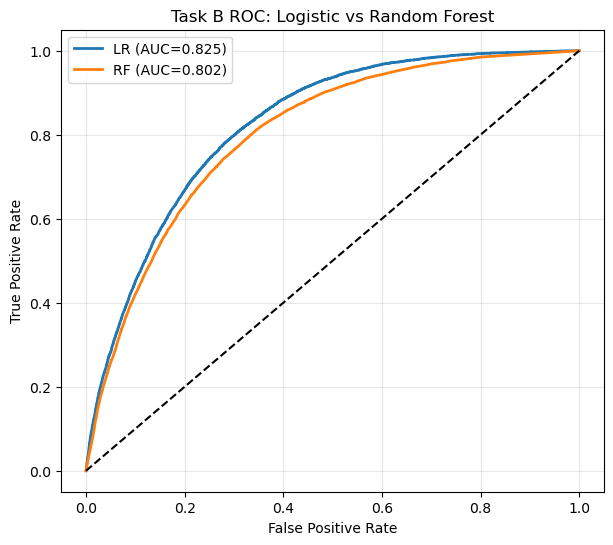

In [49]:
plot_roc(yB_test, results_B["lr_prob"], results_B["rf_prob"], 
         "Task B ROC: Logistic vs Random Forest")


Task 2 Conclusion:

The results suggest that all binary splitting strategies lead to very similar outcomes. Both logistic regression and random forest achieve nearly identical performance under different definitions, indicating that the pre-diabetes group does not lean toward either the non-diabetic or diabetic categories. From the feature perspective, pre-diabetes indeed behaves as a neutral middle category.

In [50]:
def plot_metric_bars(perf_table, title):
    plt.figure(figsize=(8,6))
    perf_table_melt = perf_table.melt(id_vars="Model", var_name="Metric", value_name="Value")

    sns.barplot(data=perf_table_melt, x="Metric", y="Value", hue="Model")
    
    plt.title(title)
    plt.ylabel("Score")
    plt.grid(axis='y', alpha=0.2)
    plt.show()


Task 3 Conclusion:

Across all evaluation metrics, logistic regression consistently outperforms random forest in our task. This shows that modern machine learning methods are not necessarily superior to traditional statistical techniques. Instead, each method has its own strengths and is more suitable for certain types of tasks

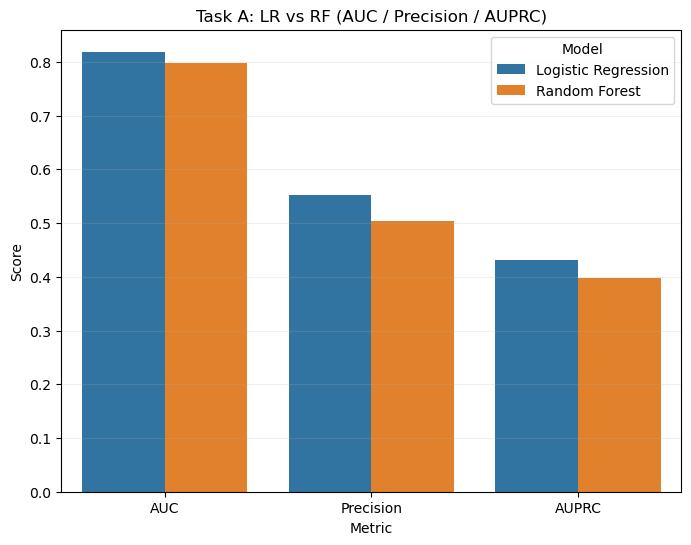

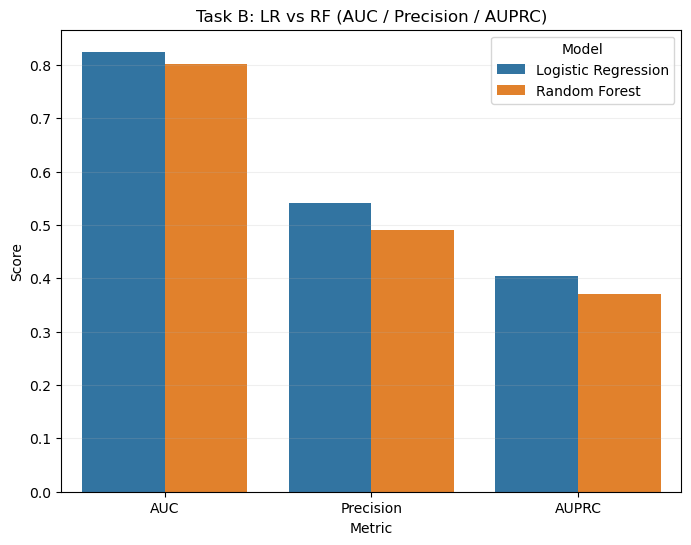

In [51]:
plot_metric_bars(perf_A, "Task A: LR vs RF (AUC / Precision / AUPRC)")
plot_metric_bars(perf_B, "Task B: LR vs RF (AUC / Precision / AUPRC)")


Discussion:

Our study demonstrates that diabetes status is strongly associated with the available features, and logistic regression alone can achieve solid predictive performance. We find that these features provide substantial predictive power for identifying diabetes, suggesting that for individuals who have not visited a hospital, it may be possible to estimate their diabetes risk purely from such feature data.
There are several directions worth exploring in future work:

1. Would embeddings derived from modern models such as LLMs yield better predictive performance?
With the rapid development of representation learning, it is possible that more expressive embeddings could capture subtle feature interactions and improve model accuracy.

2. Can these features be used to predict diabetes onset over a longer time horizon—such as 3 or 5 years?
If so, the model could support earlier prevention and more proactive health management. Naturally, building such models would require collecting longitudinal datasets that track individuals over time.

3. Can cross-sectional prediction models like ours be transferred to help solve the longitudinal prediction problem?
Directly training a 3- or 5-year onset prediction model requires long-term follow-up data, which is expensive and time-consuming to collect. In contrast, the type of dataset we use here can be acquired quickly in clinical settings. If models trained on current cross-sectional data can effectively transfer to the longitudinal prediction task, this would significantly reduce costs and enable faster deployment.